In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read World Happiness Report into pandas
arrivals= "Data/GDP.csv"
arrivals_df = pd.read_csv(arrivals)

arrivals_df.head()

,Country_Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,...,1.695820e+12,1.667020e+12,2.208870e+12,2.616200e+12,2.465190e+12,2.472810e+12,2.455990e+12,1.803650e+12,1.796190e+12,NaN
1,Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,4.109345e+10,4.076797e+10,4.197885e+10,4.465717e+10,4.888294e+10,5.390957e+10,...,1.549130e+12,1.371150e+12,1.613460e+12,1.788650e+12,1.824290e+12,1.842630e+12,1.799270e+12,1.559620e+12,1.535770e+12,NaN
2,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,...,4.598210e+12,5.109950e+12,6.100620e+12,7.572550e+12,8.560550e+12,9.607220e+12,1.048240e+13,1.106470e+13,1.119910e+13,NaN
3,France,FRA,GDP (current US$),NY.GDP.MKTP.CD,6.265147e+10,6.834674e+10,7.631378e+10,8.555111e+10,9.490659e+10,1.021610e+11,...,2.923470e+12,2.693830e+12,2.646840e+12,2.862680e+12,2.681420e+12,2.808510e+12,2.849310e+12,2.433560e+12,2.465450e+12,NaN
4,Germany,DEU,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.752370e+12,3.418010e+12,3.417090e+12,3.757700e+12,3.543980e+12,3.752510e+12,3.890610e+12,3.375610e+12,3.477800e+12,NaN


In [29]:
# Create dataframe for winning countries
GDP_winners_df = arrivals_df.loc[(arrivals_df["Country_Name"] == "Spain")|(arrivals_df["Country_Name"] == "Italy") | (arrivals_df["Country_Name"] == "Germany")| (arrivals_df["Country_Name"] == "Brazil")]

# Set the 'Country name' to be our index for easy referencing of rows and drop colmns we dont need
GDP_winners_df = GDP_winners_df.set_index("Country_Name")
GDP_winners_df.drop([ 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

GDP_control_df = arrivals_df.loc[arrivals_df["Country_Name"].isin(['Australia','Canada','China','France','India','Indonesia','Japan','Korea, Rep.','Mexico','Netherlands','Russian Federation','Saudi Arabia','Switzerland','Turkey','United Kingdom','United States'])]
#arrivals_Control_df = arrivals_df.loc[(arrivals_df["Country Name"] == "UK") | (arrivals_df["Country Name"] == "France") | (arrivals_df["Country Name"] == "Brazil") ]
GDP_control_df = GDP_control_df.set_index("Country_Name")

GDP_control_df.drop([ 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
GDP_control_df.head()

# find the average of arrivals between control countries
mean=GDP_control_df.mean(axis=0)



In [30]:
# Collect the years where data was collected
keys = GDP_control_df.mean()
years = GDP_control_df.keys()
years

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

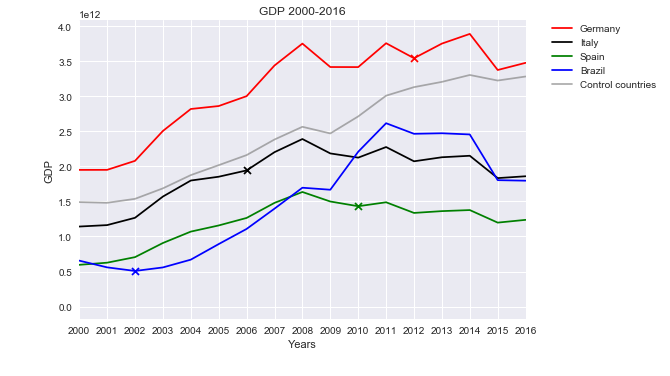

In [31]:
# Plot the number of arrivals for each country and add marker X for the winning year
plt.plot(years, GDP_winners_df.loc['Germany', years], 
         color="red", label="Germany")
plt.scatter( (GDP_winners_df.loc['Germany'].keys()[52]),GDP_winners_df.loc['Germany', '2012'],  color="red",marker='x',label='_nolegend_')


plt.plot(years, GDP_winners_df.loc['Italy', years], 
         color="black", label="Italy")
plt.scatter( (GDP_winners_df.loc['Italy'].keys()[46]),GDP_winners_df.loc['Italy', '2006'],  color="black",marker='x',label='_nolegend_')


plt.plot(years, GDP_winners_df.loc['Spain', years], 
         color="green", label="Spain")
plt.scatter( (GDP_winners_df.loc['Italy'].keys()[50]),GDP_winners_df.loc['Spain', '2010'],  color="green",marker='x',label='_nolegend_')

plt.plot(years, GDP_winners_df.loc['Brazil', years], 
         color="blue", label="Brazil")
plt.scatter( (GDP_winners_df.loc['Brazil'].keys()[42]),GDP_winners_df.loc['Brazil', '2002'],  color="blue",marker='x',label='_nolegend_')

## plot graph for average of control countries
plt.plot(years, mean, color='grey',alpha=0.65, label="Control countries ")


plt.xlim(2000, 2016)

## create Legend and place outside of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("GDP 2000-2016")
plt.xlabel("Years")
plt.ylabel("GDP")

# Customize the grid
plt.style.use('seaborn')


# Add arrow
plt.annotate('Great Spanish Depression', xy=('2010-10-25', 40), xytext=('2011-08-25', 60),
            arrowprops=dict(arrowstyle="->",facecolor='black'))

# Show the chart
plt.show()
